# Análisis de Ajedrez y Estadísticas de Homicidios

Este proyecto explora la relación entre estadísticas de partidas de ajedrez y datos de homicidios, utilizando técnicas de visualización para identificar posibles correlaciones y patrones interesantes.

In [63]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import Blues

matplotlib.rcParams.update({'font.size': 14})

In [64]:
# Hacer que los gráficos de matplotlib tengan
# una resolución decente en Jupyter:
%config InlineBackend.figure_format = 'retina'

# Primera parte: Ajedrez

Vamos a comenzar analizando el dataset [Chess Game Dataset (Lichess)](https://www.kaggle.com/datasnaek/chess). En él podemos encontrar la información de partidas de jugadas en lichess.org como el número de turnos, los jugadores y el ganador.

In [65]:
chess_df = pd.read_csv("games.csv")
chess_df.head(5)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


## Ejercicio 1

¿En el ajedrez, se nota la ventaja de empezar moviendo?


In [66]:
# Contamos las victorias por color
winner_counts = chess_df['winner'].value_counts()
winner_counts

winner
white    10001
black     9107
draw       950
Name: count, dtype: int64

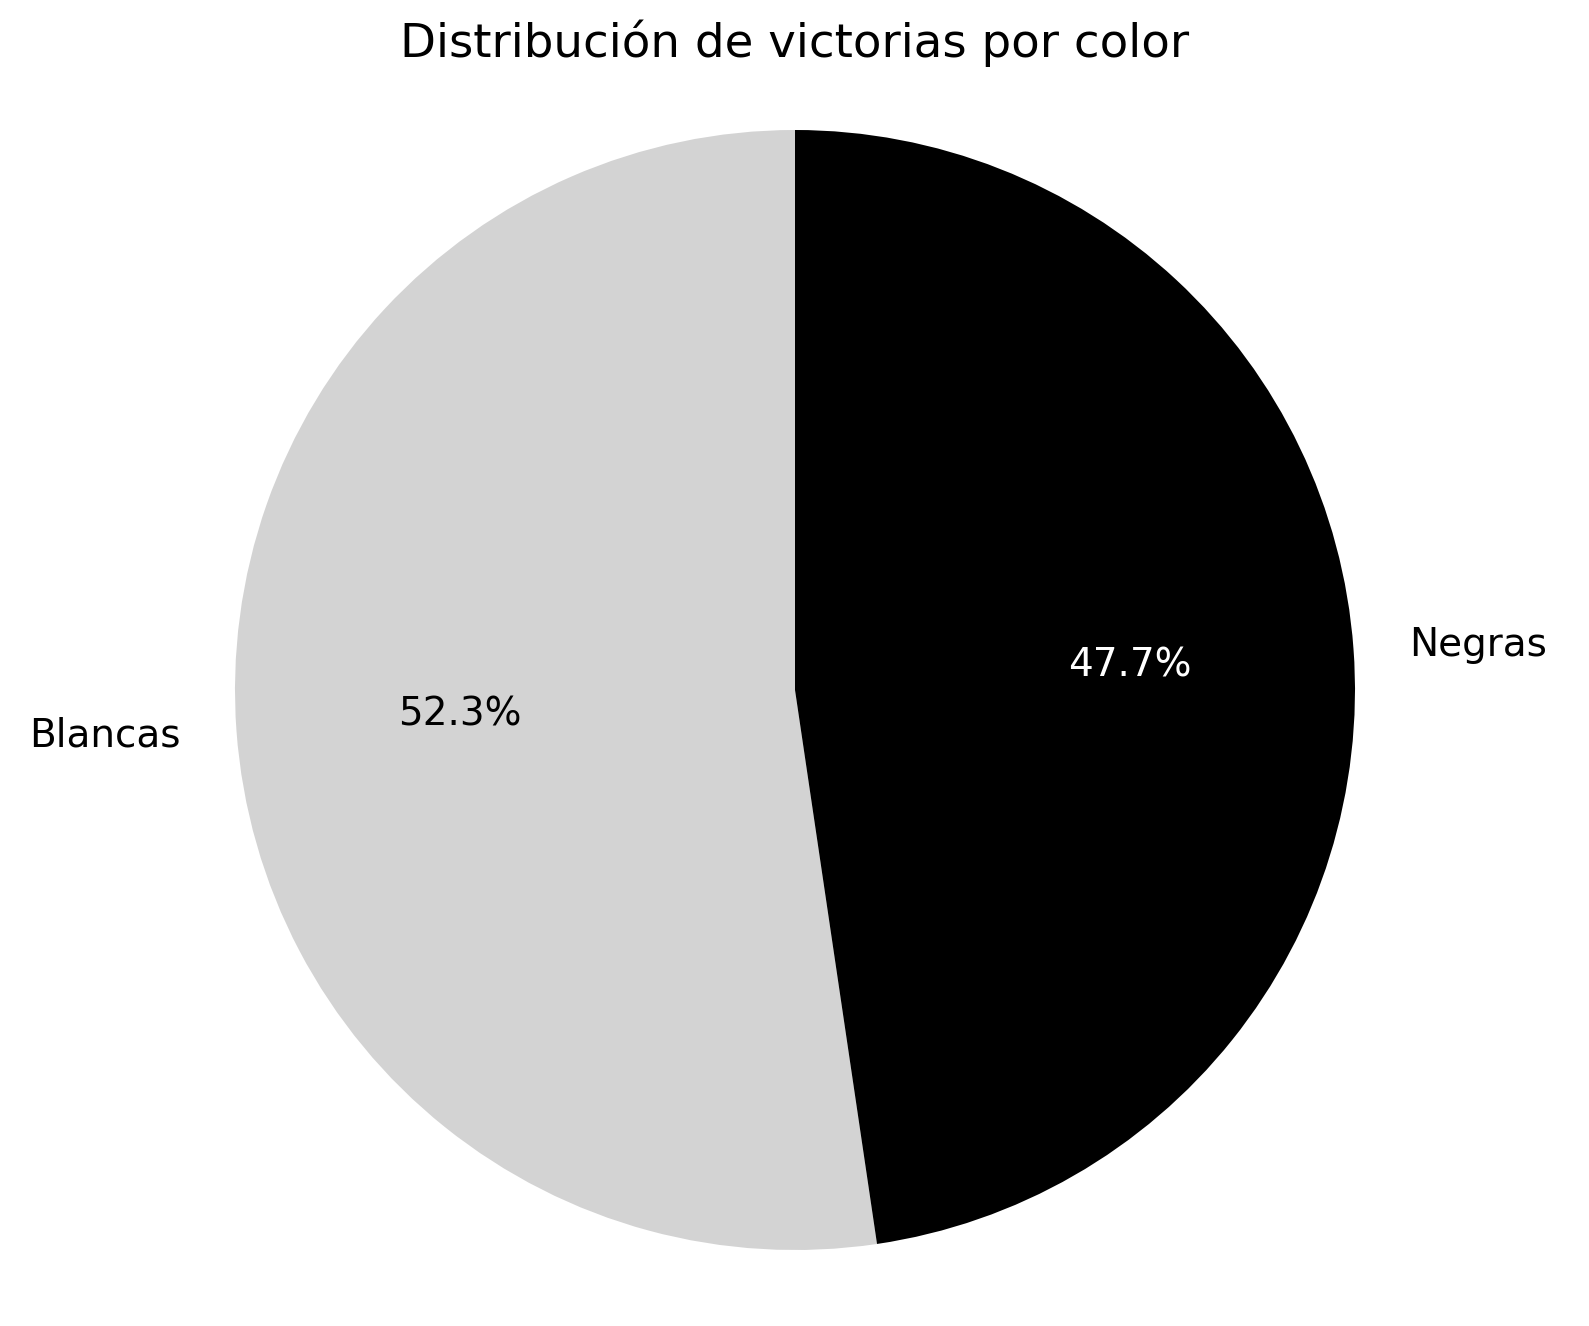

In [67]:
# Contamos las victorias por color
winner_counts = chess_df['winner'].value_counts()

# Creamos el gráfico circular
plt.figure(figsize=(10, 8))

# Creamos el gráfico de pie con colores personalizados
patches, texts, autotexts = plt.pie([winner_counts['white'], winner_counts['black']], 
                                  labels=['Blancas', 'Negras'],
                                  colors=['lightgray', 'black'],
                                  autopct='%1.1f%%',
                                  startangle=90)

# Cambiamos el color del texto en la porción negra
for autotext in autotexts:
    if autotext.get_text() == f"{(winner_counts['black']/(winner_counts['white'] + winner_counts['black']))*100:.1f}%":
        autotext.set_color('white')

plt.title('Distribución de victorias por color')
plt.axis('equal') 
plt.show()

## Ejercicio 2

¿Cuántas rondas suelen durar las partidas de ajedrez?

In [68]:
rounds = chess_df['turns'].value_counts()
rounds

#podria ser grafico de distribución y/o densidad

turns
53     303
45     302
51     299
57     297
39     297
      ... 
216      1
208      1
176      1
218      1
201      1
Name: count, Length: 211, dtype: int64

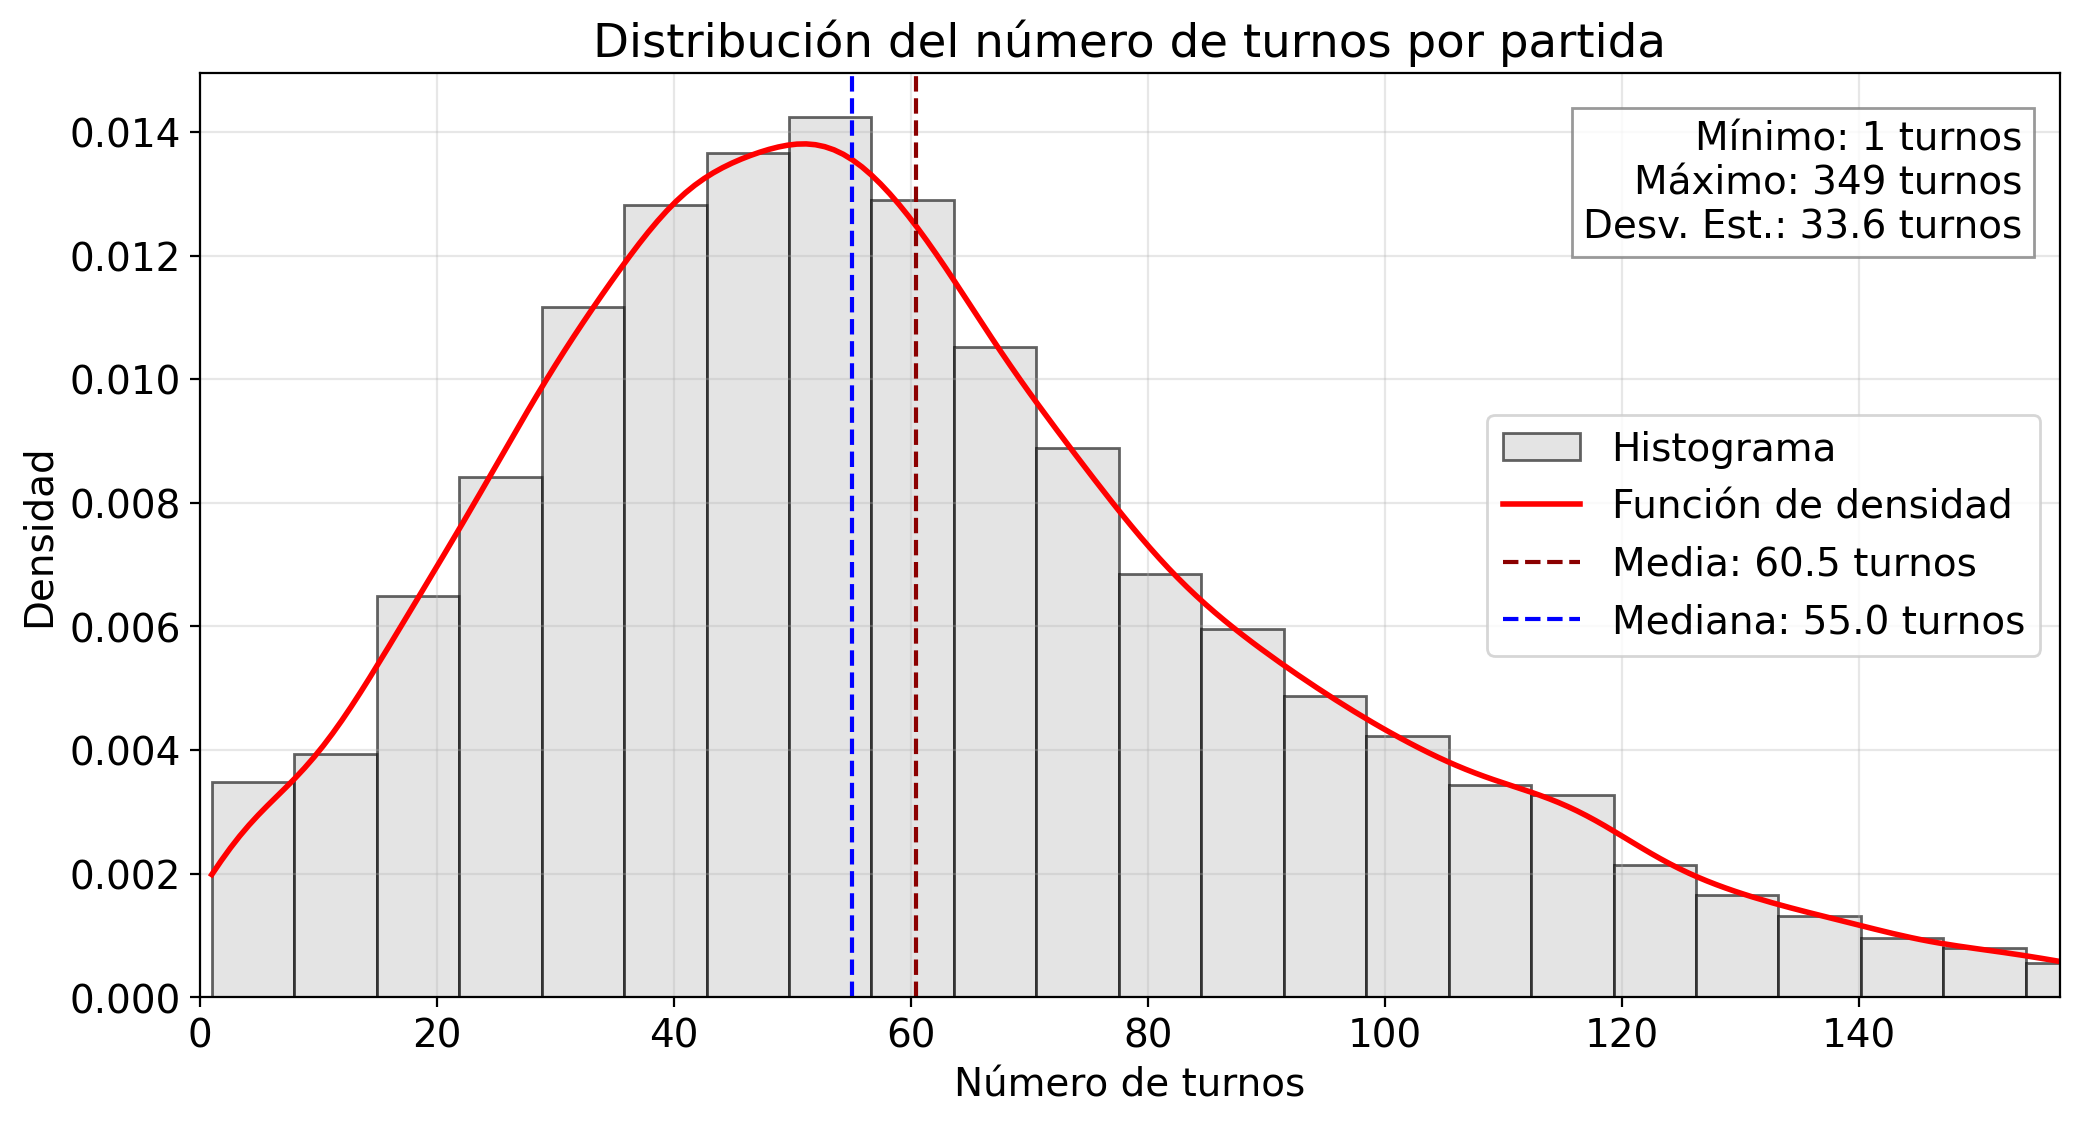

In [69]:
from scipy import stats

# Creamos la figura
plt.figure(figsize=(12, 6))

# Creamos el histograma con densidad
n, bins, patches = plt.hist(chess_df['turns'], bins=50, density=True, alpha=0.6,
                          color='lightgray', edgecolor='black', label='Histograma')

# Calculamos y dibujamos la función de densidad
kde = stats.gaussian_kde(chess_df['turns'])
x_range = np.linspace(chess_df['turns'].min(), chess_df['turns'].quantile(0.99), 200)
plt.plot(x_range, kde(x_range), 'r-', lw=2, label='Función de densidad')

# Calculamos la media y mediana
mean_turns = chess_df['turns'].mean()
median_turns = chess_df['turns'].median()

# Añadimos líneas verticales para la media y mediana
plt.axvline(mean_turns, color='darkred', linestyle='--', 
            label=f'Media: {mean_turns:.1f} turnos')
plt.axvline(median_turns, color='blue', linestyle='--', 
            label=f'Mediana: {median_turns:.1f} turnos')

# Añadimos estadísticas descriptivas
plt.text(0.98, 0.95, 
         f'Mínimo: {chess_df["turns"].min():.0f} turnos\n'
         f'Máximo: {chess_df["turns"].max():.0f} turnos\n'
         f'Desv. Est.: {chess_df["turns"].std():.1f} turnos',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
         ha='right', va='top')

# Personalizamos el gráfico
plt.title('Distribución del número de turnos por partida')
plt.xlabel('Número de turnos')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, alpha=0.3)

# Ajustamos los límites del eje x para mejor visualización
plt.xlim(0, chess_df['turns'].quantile(0.99))

plt.show()

## Ejercicio 3

¿Cuales son las formas más comunes de terminar las partidas de ajedrez?


In [70]:
# Obtenemos los datos
victory_counts = chess_df['victory_status'].value_counts()
total_games = victory_counts.sum()

victory_counts
# podría ser un grafico circular o barra apilada o densidad apilada

victory_status
resign       11147
mate          6325
outoftime     1680
draw           906
Name: count, dtype: int64

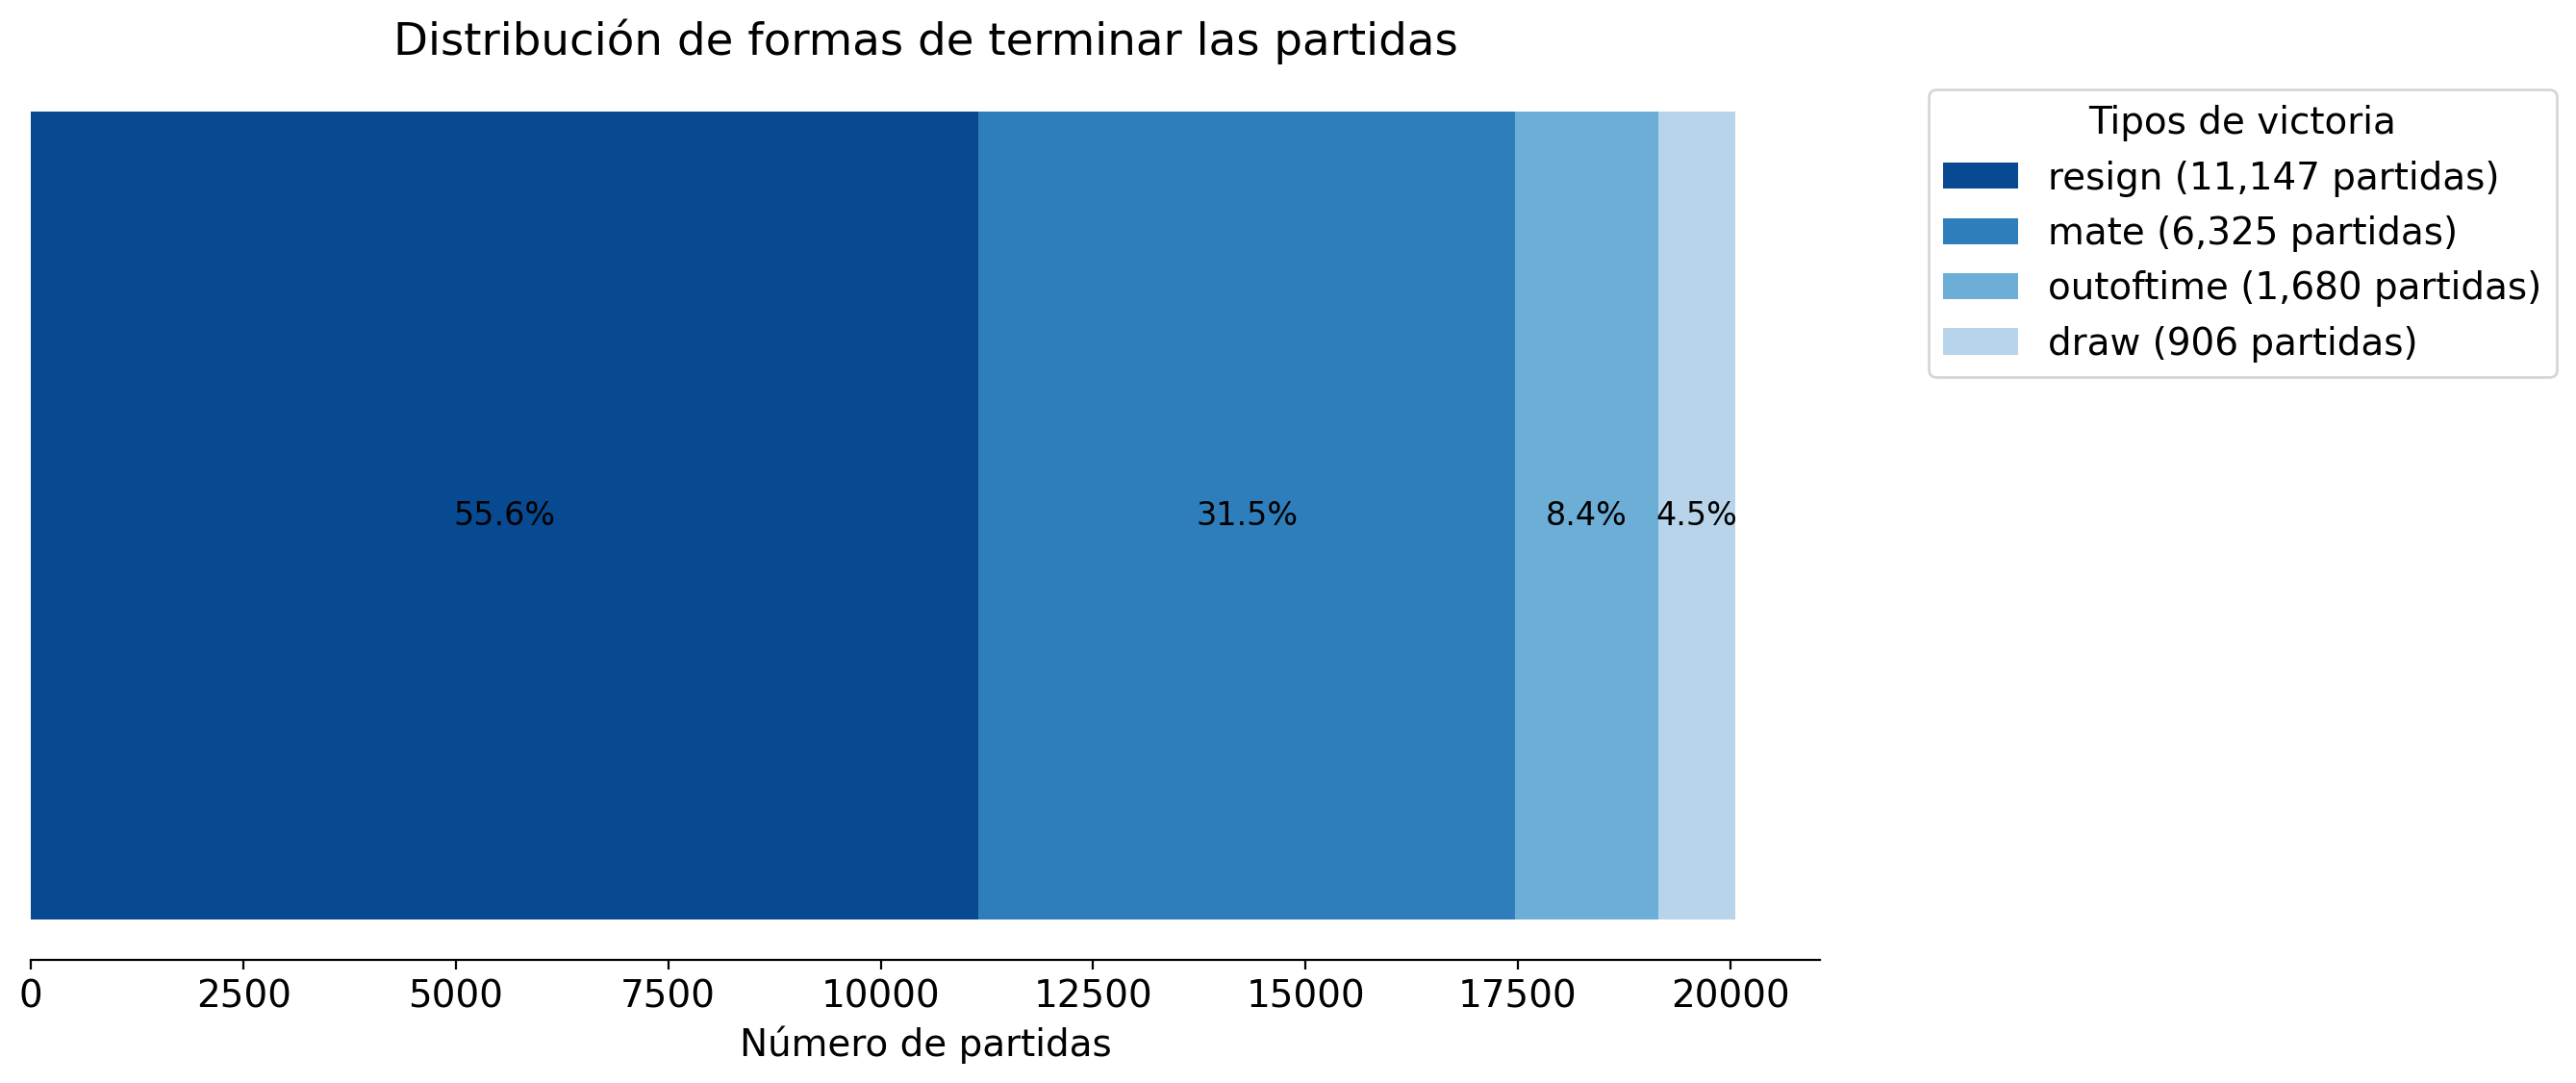

In [71]:
# Creamos la figura
plt.figure(figsize=(12, 6))

# Creamos una paleta de colores usando Blues (invertida)
n_categories = len(victory_counts)
colors = Blues(np.linspace(0.9, 0.3, n_categories))  # Invertimos el orden de 0.9 a 0.3

# Creamos las barras apiladas horizontales
bars = plt.barh(0, victory_counts.values, 
                left=np.append(0, np.cumsum(victory_counts.values)[:-1]),
                color=colors)

# Añadimos solo los porcentajes en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    pct = (width/total_games) * 100
    
    # Posicionamos el texto en el centro de cada barra
    x_pos = bar.get_x() + width/2
    # Texto negro para todas las barras ya que ahora las más frecuentes son más claras
    plt.text(x_pos, 0, f'{pct:.1f}%', 
             ha='center', va='center',
             fontsize=12,
             color='black')

# Creamos las etiquetas para la leyenda con los valores absolutos
legend_labels = [f'{name} ({count:,} partidas)' 
                for name, count in victory_counts.items()]

# Añadimos la leyenda
plt.legend(bars, legend_labels,
          title='Tipos de victoria',
          bbox_to_anchor=(1.05, 1),
          loc='upper left')

# Personalizamos el gráfico
plt.title('Distribución de formas de terminar las partidas')
plt.xlabel('Número de partidas')

# Eliminamos los ticks y las líneas del eje y
plt.yticks([])
ax = plt.gca()
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

# Segunda parte: Homicidios

Para la segunda parte vamos a emplear el dataset [Homicide Reports, 1980-2014](https://www.kaggle.com/murderaccountability/homicide-reports). Este contiene la información de más de 22000 homicidios cometidos en EEUU. Podemos encontrar información como la raza y el género tanto de la víctima como del asesino.

In [72]:
homicide = pd.read_csv("homicide.csv", low_memory=False)

homicide.head()
homicide.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

## Ejercicio 4

Nos gustaría saber cuál es el perfil de las víctimas de los homicidios. Es decir, a qué raza y género pertenecen.


In [92]:
gender_counts = homicide['Victim Sex'].value_counts()
gender_counts

Victim Sex
Male       494125
Female     143345
Unknown       984
Name: count, dtype: int64

In [74]:
total = gender_counts.sum()
total


638454

In [75]:
race_counts = homicide['Victim Race'].value_counts()
race_counts

Victim Race
White                            317422
Black                            299899
Asian/Pacific Islander             9890
Unknown                            6676
Native American/Alaska Native      4567
Name: count, dtype: int64

In [83]:
total = race_counts.sum()
total

638454

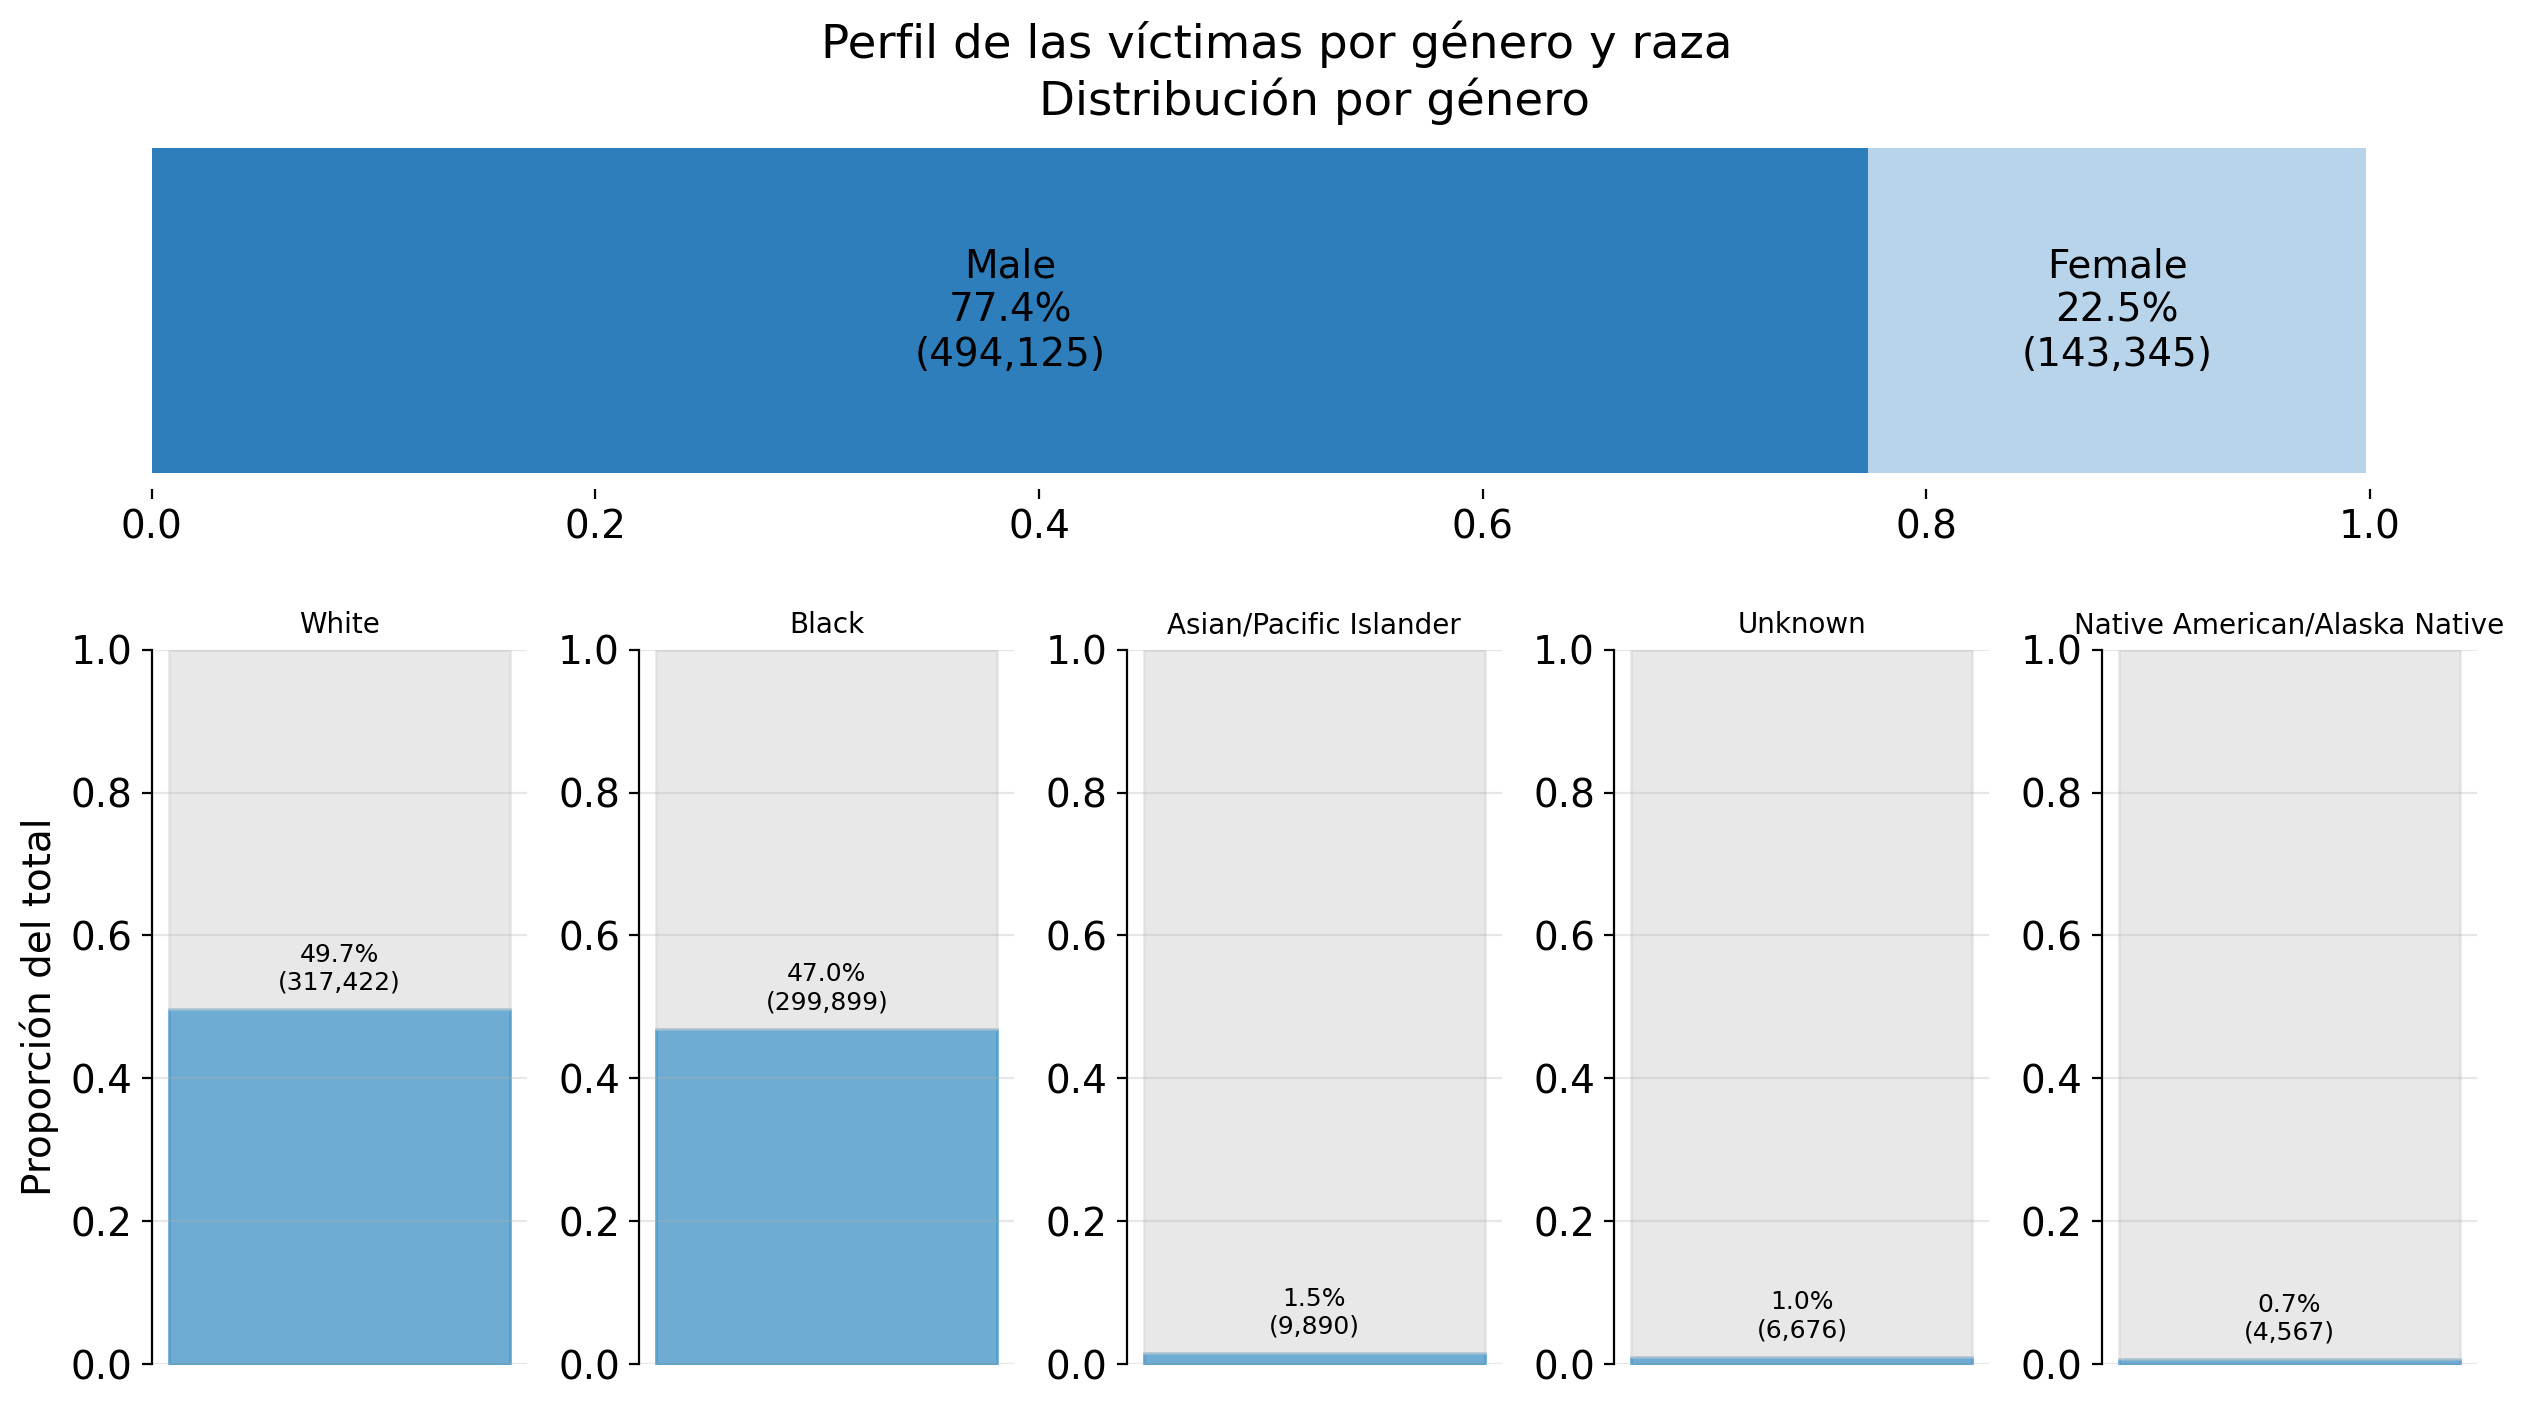

In [94]:
# Creamos una figura con dos partes: una para género y otra para raza
fig = plt.figure(figsize=(15, 8))

# Creamos un grid específico: la barra de género arriba y los subplots de raza abajo
gs = fig.add_gridspec(2, 1, height_ratios=[1, 2], hspace=0.3)

# Subplot para género (barra horizontal)
ax_gender = fig.add_subplot(gs[0])

# Calculamos proporciones de género
gender_counts = homicide['Victim Sex'].value_counts()
gender_total = gender_counts.sum()
gender_props = gender_counts / gender_total

# Creamos la barra horizontal apilada para género
ax_gender.barh(0, gender_props['Male'], color=Blues(0.7))
ax_gender.barh(0, gender_props['Female'], left=gender_props['Male'], color=Blues(0.3))

# Añadimos porcentajes en las barras
ax_gender.text(gender_props['Male']/2, 0, f'Male\n{gender_props["Male"]:.1%}\n({gender_counts["Male"]:,})', 
               ha='center', va='center')
ax_gender.text(gender_props['Male'] + gender_props['Female']/2, 0, 
               f'Female\n{gender_props["Female"]:.1%}\n({gender_counts["Female"]:,})', 
               ha='center', va='center')

# Personalizamos el gráfico de género
ax_gender.set_title('Distribución por género')
ax_gender.set_yticks([])
ax_gender.spines['top'].set_visible(False)
ax_gender.spines['right'].set_visible(False)
ax_gender.spines['left'].set_visible(False)
ax_gender.spines['bottom'].set_visible(False)

# Creamos los subplots para raza
axes_race = gs[1].subgridspec(1, 5, wspace=0.3)
ax_races = [fig.add_subplot(axes_race[i]) for i in range(5)]

# Para cada raza
races = ['White', 'Black', 'Asian/Pacific Islander', 'Unknown', 'Native American/Alaska Native']
for i, race in enumerate(races):
    # Calculamos la proporción
    race_count = len(homicide[homicide['Victim Race'] == race])
    proportion = race_count / len(homicide)
    
    # Creamos el área sombreada
    ax_races[i].fill_between([0, 1], [proportion, proportion], 
                           color=Blues(0.6), alpha=0.8)
    ax_races[i].fill_between([0, 1], [1, 1], [proportion, proportion], 
                           color='lightgray', alpha=0.5)
    
    # Personalizamos cada subplot
    ax_races[i].set_title(race, fontsize=10)
    ax_races[i].set_ylim(0, 1)
    ax_races[i].grid(True, axis='y', alpha=0.3)
    
    # Eliminamos elementos innecesarios
    ax_races[i].set_xticks([])
    ax_races[i].spines['top'].set_visible(False)
    ax_races[i].spines['right'].set_visible(False)
    ax_races[i].spines['bottom'].set_visible(False)
    
    # Añadimos los porcentajes encima del área azul
    ax_races[i].text(0.5, proportion + 0.02, f'{proportion:.1%}\n({race_count:,})', 
                    ha='center', va='bottom', fontsize=9)
    
    # Añadimos etiqueta del eje y solo al primer subplot
    if i == 0:
        ax_races[i].set_ylabel('Proporción del total')

plt.suptitle('Perfil de las víctimas por género y raza', y=0.95)
plt.show()

## Ejercicio 5

Para terminar, querríamos ver el perfil de las víctimas y cómo se relaciona este con el de los asesinos. Es decir, ¿se matan más las mujeres y los hombres entre ellos? ¿son más comunes los asesinatos con géneros cruzados?. Lo mismo con las razas, ¿es más común que los blancos se maten entre ellos?